# MC, Linear Regression and Random Forest with Linear and Brownian Loss

In the case of the linear linear loss, linear regression was by far the best. In the case of the brownian loss, linear regression only beat MC when the dimension was 1, or when the brownian loss was still linear. Otherwise, it lost to MC by a large amount. 

Random forest is useless in its current implementation. In principle, it has to be strictly weaker than mc, because it will only predict failures when it detects one.

A good method will predict failures without seeing them. One way to do this may be to approximate the function locally with linear models. Local models will struggle to overcome the curse of dimensionality.

Another thing worth testing is when the coefficients of the Brownian model are far larger or far smaller than one whether the linear method works well.

In [67]:
import pandas as pd

## Monte Carlo

In [211]:
mc = pd.read_csv("/Users/rotsy/Dropbox/caltech/senior/ids/198/Final Report/Data/mc_filtered.csv")
mc.head()

,gType,gCalls,dim,pF,method,delta
0,brownian,50,1,0.10,mc,0.080277
1,brownian,100,1,0.10,mc,0.039158
2,brownian,100,1,0.05,mc,0.091165
3,brownian,200,1,0.05,mc,0.051747
4,brownian,500,1,0.01,mc,0.085114


In [212]:
from math import log

In [213]:
logdim = list(map(
    lambda dim: log(dim, 10), 
    list(mc["dim"])
))

In [214]:
hits = list(map(
    lambda row: round(float(row["gCalls"]) * float(row["pF"])),
    list(mc.to_dict("records"))
))

In [215]:
mc["log(dim)"] = logdim
mc["hits"] = hits

In [216]:
mc.head()

,gType,gCalls,dim,pF,method,delta,log(dim),hits
0,brownian,50,1,0.10,mc,0.080277,0.0,5
1,brownian,100,1,0.10,mc,0.039158,0.0,10
2,brownian,100,1,0.05,mc,0.091165,0.0,5
3,brownian,200,1,0.05,mc,0.051747,0.0,10
4,brownian,500,1,0.01,mc,0.085114,0.0,5


In [54]:
from plotnine import *

In [217]:
mcPlot = (
    ggplot(mc)
    + aes(x="pF", y="delta", group="gType", color="gType")
    + geom_line()
    + facet_grid('hits ~ dim',labeller=label_both)
    + scale_x_log10()
    + scale_fill_gradient(name = "dim", trans = "log")
    + ggtitle("Monte Carlo Performance")
    + theme_light()
)

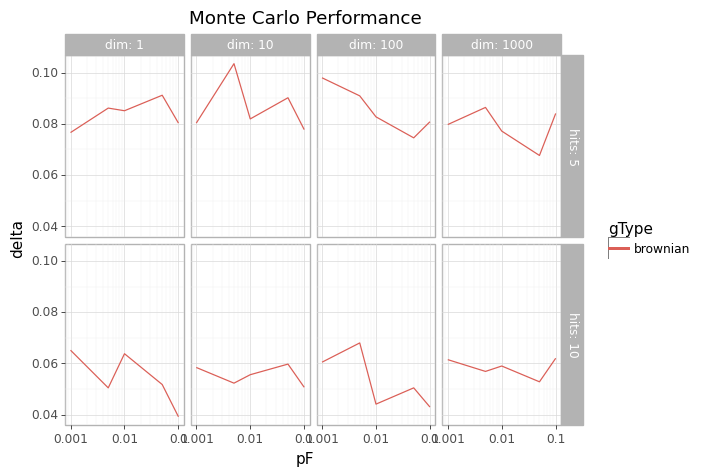

<ggplot: (8771264975565)>

In [218]:
mcPlot

## Polynomial Regression

In [243]:
poly2 = pd.read_csv("/Users/rotsy/Dropbox/caltech/senior/ids/198/Final Report/Data/poly2_filtered.csv")
poly3 = pd.read_csv("/Users/rotsy/Dropbox/caltech/senior/ids/198/Final Report/Data/poly3_filtered.csv")
poly4 = pd.read_csv("/Users/rotsy/Dropbox/caltech/senior/ids/198/Final Report/Data/poly4_filtered.csv")
svm = pd.read_csv("/Users/rotsy/Dropbox/caltech/senior/ids/198/Final Report/Data/svm_filtered.csv")
rf = pd.read_csv("/Users/rotsy/Dropbox/caltech/senior/ids/198/Final Report/Data/rf_filtered.csv")

In [244]:
def add_logdim_and_hits(df):
    logdim = list(map(
        lambda dim: log(dim, 10), 
        list(df["dim"])
    ))
    hits = list(map(
        lambda row: round(float(row["gCalls"]) * float(row["pF"])),
        list(df.to_dict("records"))
    ))
    df["log(dim)"] = logdim
    df["hits"] = hits

In [245]:
add_logdim_and_hits(poly2)
add_logdim_and_hits(poly3)
add_logdim_and_hits(poly4)
add_logdim_and_hits(svm)
add_logdim_and_hits(rf)

In [159]:
poly2Plot = (
    ggplot(poly2)
    + aes(x="pF", y="delta")
    + geom_line()
    + facet_grid('hits ~ dim',labeller=label_both)
    + scale_x_log10()
    + scale_fill_gradient(name = "dim", trans = "log")
    + ggtitle("Polynomial Regression with degree=2 Performance")
    + theme_light()
)

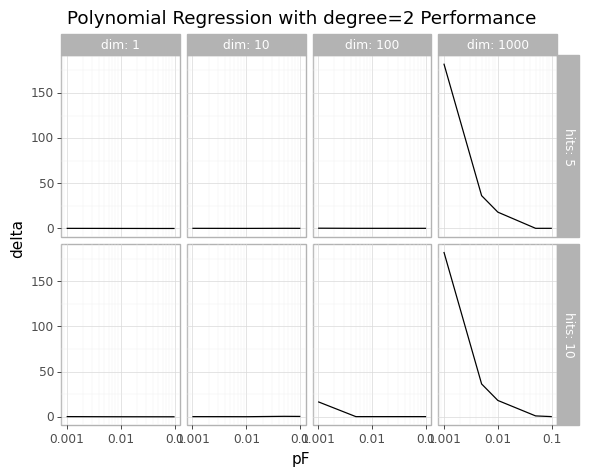

<ggplot: (8771264305987)>

In [160]:
poly2Plot

In [157]:
poly2Plot2 = (
    ggplot(poly2[poly2["dim"] < 100])
    + aes(x="pF", y="delta")
    + geom_line()
    + facet_grid('hits ~ dim',labeller=label_both)
    + scale_x_log10()
    + scale_fill_gradient(name = "dim", trans = "log")
    + ggtitle("Polynomial Regression with degree=2 Performance")
    + theme_light()
)

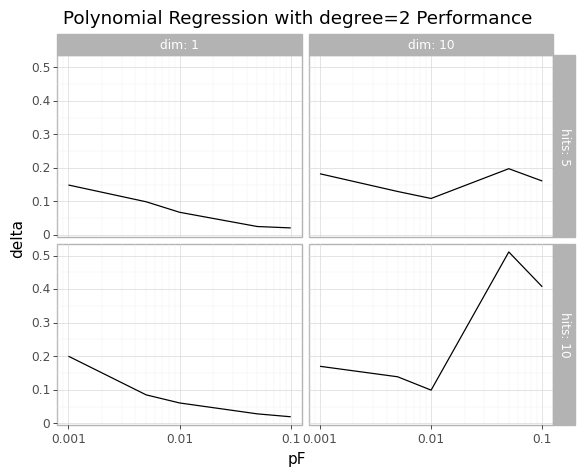

<ggplot: (8771263235708)>

In [158]:
poly2Plot2

In [155]:
poly3Plot = (
    ggplot(poly3)
    + aes(x="pF", y="delta")
    + geom_line()
    + facet_grid('hits ~ dim',labeller=label_both)
    + scale_x_log10()
    + scale_fill_gradient(name = "dim", trans = "log")
    + ggtitle("Polynomial Regression with degree=3 Performance")
    + theme_light()
)

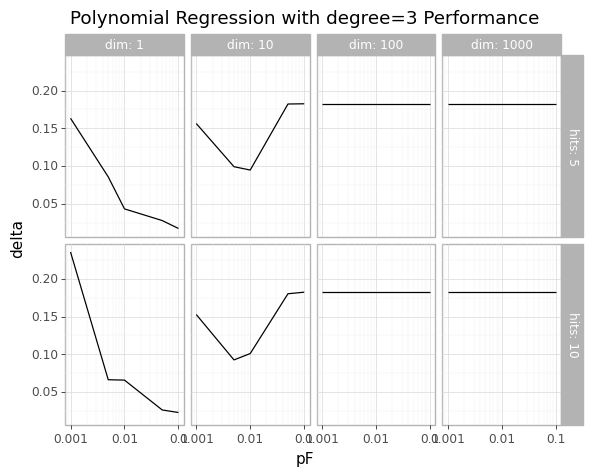

<ggplot: (8771262748275)>

In [156]:
poly3Plot

In [246]:
poly4Plot = (
    ggplot(poly4)
    + aes(x="pF", y="delta")
    + geom_line()
    + facet_grid('hits ~ dim',labeller=label_both)
    + scale_x_log10()
    + scale_fill_gradient(name = "dim", trans = "log")
    + ggtitle("Polynomial Regression with degree=3 Performance")
    + theme_light()
)

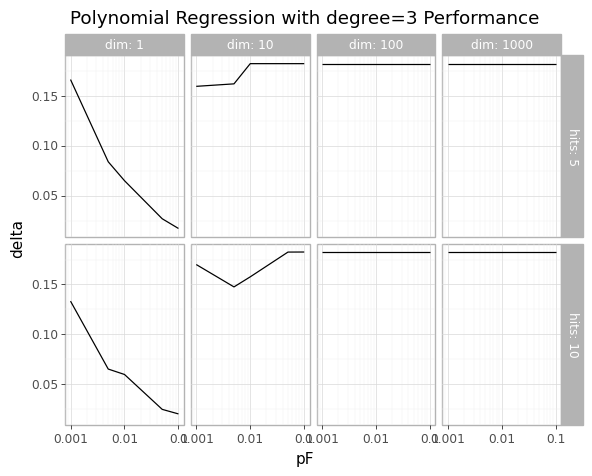

<ggplot: (8771262617899)>

In [247]:
poly4Plot

In [205]:
svmPlot = (
    ggplot(svm)
    + aes(x="pF", y="delta")
    + geom_line()
    + facet_grid('hits ~ dim',labeller=label_both)
    + scale_x_log10()
    + scale_fill_gradient(name = "dim", trans = "log")
    + ggtitle("SVM Performance")
    + theme_light()
)

/Users/rotsy/opt/miniconda3/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/Users/rotsy/opt/miniconda3/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


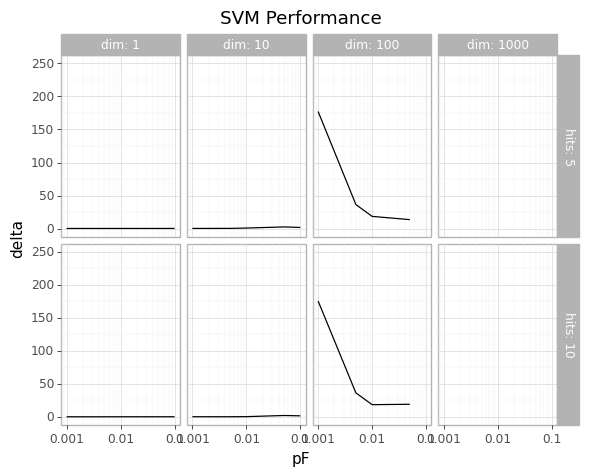

<ggplot: (8771264310763)>

In [206]:
svmPlot

,gType,gCalls,method,dim,pF,delta,log(dim),hits
28,brownian,10000,svm,1000,0.001,208.3059,3.0,10
29,brownian,5000,svm,1000,0.001,249.7500,3.0,5


In [225]:
rfPlot = (
    ggplot(rf)
    + aes(x="pF", y="delta")
    + geom_line()
    + facet_grid('hits ~ dim',labeller=label_both)
    + scale_x_log10()
    + scale_fill_gradient(name = "dim", trans = "log")
    + ggtitle("Polynomial Regression with degree=3 Performance")
    + theme_light()
)

/Users/rotsy/opt/miniconda3/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


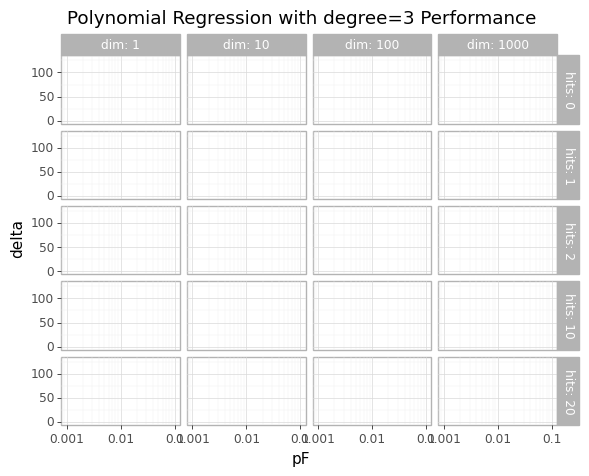

<ggplot: (8771263407427)>

In [226]:
rfPlot

In [227]:
summary = pd.concat([mc, svm, poly2, poly3], ignore_index=True)

In [252]:
summaryPlot = (
    ggplot(summary)
    + aes(x="pF", y="delta", group="method", color="method")
    + geom_line()
    + facet_grid('hits ~ dim',labeller=label_both)
    + scale_x_log10()
    + scale_fill_gradient(name = "dim", trans = "log")
    + ggtitle("Method Performance Summary")
    + theme_light()
)

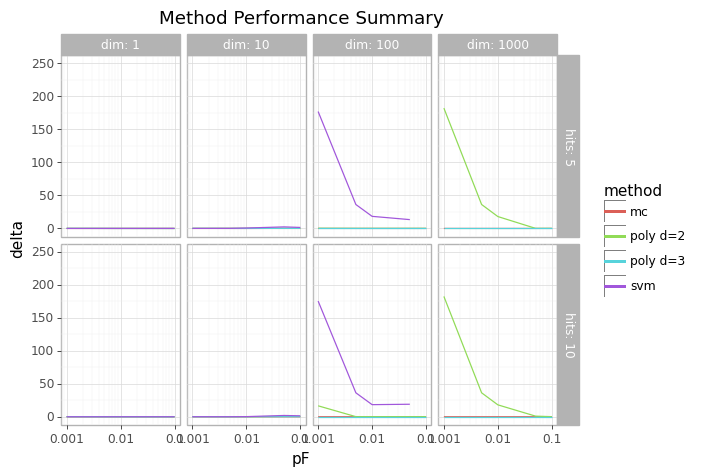

<ggplot: (8771262963035)>

In [253]:
summaryPlot

In [267]:
summaryPlot.save("all_methods_performance.png", dpi = 600)

/Users/rotsy/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/rotsy/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: all_methods_performance.png


In [248]:
summaryPlot2 = (
    ggplot(summary[summary["dim"] < 100])
    + aes(x="pF", y="delta", group="method", color="method")
    + geom_line()
    + facet_grid('hits ~ dim',labeller=label_both)
    + scale_x_log10()
    + scale_fill_gradient(name = "dim", trans = "log")
    + ggtitle("All Methods Low Dimensional Performance")
    + theme_light()
)

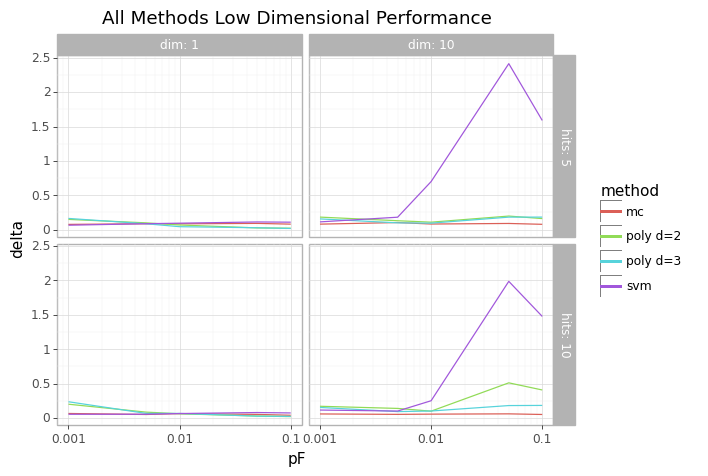

<ggplot: (8771262281948)>

In [249]:
summaryPlot2

In [255]:
summaryPlot2.save("all_methods_low_dim_performance.png", dpi = 600)

/Users/rotsy/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/rotsy/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: all_methods_low_dim_performance.png


In [233]:
summarynosvm = pd.concat([mc, poly2, poly3], ignore_index=True)

In [265]:
summaryPlot3 = (
    ggplot(summary[summary["dim"] < 100][summary["method"]!="poly d=2"][summary["pF"]<0.05])
    + aes(x="pF", y="delta", group="method", color="method")
    + geom_line()
    + facet_grid('hits ~ dim',labeller=label_both)
    + scale_x_log10()
    + scale_fill_gradient(name = "dim", trans = "log")
    + ggtitle("Low Dim Runner-ups vs. MC Performance")
    + theme_light()
)

<ipython-input-265-97dc286246ba>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<ipython-input-265-97dc286246ba>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


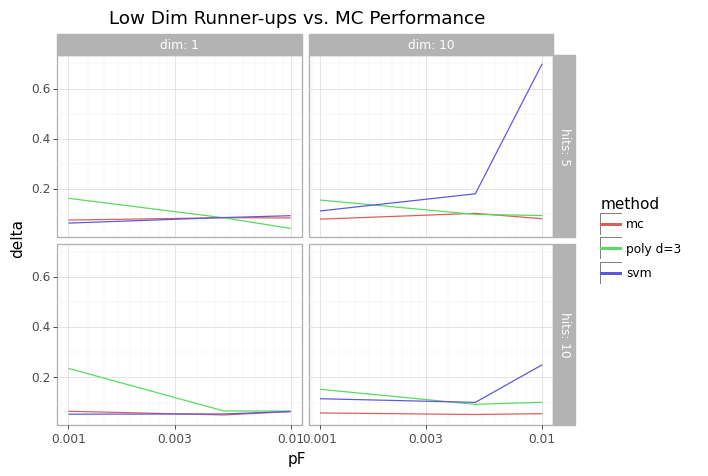

<ggplot: (8771264634049)>

In [266]:
summaryPlot3

In [254]:
summaryPlot3.save("poly3_vs_mc_performance.png", dpi = 600)

/Users/rotsy/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/rotsy/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: poly3_vs_mc_performance.png
